In [6]:
!pip install google.colab

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement google.colab (from versions: none)
ERROR: No matching distribution found for google.colab


In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

# A. Scraping

In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
pip install selenium

  Using cached selenium-4.31.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached trio-0.30.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached trio_websocket-0.12.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached outcome-1.3.0.post0-py2.py3-none-any.whl.metadata (2.6 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl.metadata (13 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
Using cached selenium-4.31.0-py3-none-any.whl (9.4 MB)
Using cached trio-0.30.0-py3-none-any.whl (499 kB)
Using cached trio_websocket-0.12.2-py3-none-any.whl (21 kB)
Using cached websocket_client

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver import FirefoxOptions
import numpy as np

from bs4 import BeautifulSoup

import sys

In [3]:
opts = FirefoxOptions()
opts.add_argument("--headless")
driver = webdriver.Firefox(options=opts)
driver2 = webdriver.Firefox(options=opts)

In [4]:
articles = pd.DataFrame({})


for i in range(2187, 2664):
  print(f"{i}/2621")
  driver.get(f"https://www.hellenicshippingnews.com/category/shipping-news/international-shipping-news/page/{i}/")
  driver.implicitly_wait(0.9)
  html = driver.page_source
  soup = BeautifulSoup(html)

  for link in soup.find_all('article'):
    try:
      driver.implicitly_wait(np.random.random()*3 + 0.5)
      driver2.get(link.find('a').get('href'))
      html2 = driver2.page_source
      soup2 = BeautifulSoup(html2)

      date = str(soup2.find_all("article")[0].find_all("span", "updated")[0].get_text())
      title = soup2.article.span.get_text()
      content = []
      for text_in_article in soup2.find_all('article')[0].find_all('div', 'entry'):
        content.append(text_in_article.get_text().replace("\n", ""))
      content = ''.join(content)

      articles = pd.concat([articles, pd.DataFrame([{'link': link.find('a').get('href'), 'date': date, 'title': title, 'content': content}])], ignore_index=True)
      with open(r'articles.txt', 'a') as f:
        f.write(json.dumps({'link': link.find('a').get('href'), 'date': date, 'title': title, 'content': content}))
    except:
      print('waiting..')
      driver.implicitly_wait(25)

2187/2621
2188/2621
2189/2621
2190/2621
2191/2621
2192/2621
2193/2621
2194/2621
2195/2621
2196/2621
2197/2621
2198/2621
2199/2621
2200/2621
2201/2621
2202/2621
2203/2621
2204/2621
2205/2621
2206/2621
waiting..
waiting..
2207/2621
2208/2621
2209/2621
2210/2621
2211/2621
2212/2621
2213/2621
2214/2621
2215/2621
2216/2621
2217/2621
2218/2621
2219/2621
2220/2621
2221/2621
2222/2621
2223/2621
2224/2621
2225/2621
2226/2621
2227/2621
2228/2621
2229/2621
2230/2621
2231/2621
2232/2621
2233/2621
2234/2621
2235/2621
2236/2621
2237/2621
2238/2621
2239/2621
2240/2621
2241/2621
2242/2621
2243/2621
2244/2621
2245/2621
2246/2621
2247/2621
2248/2621
2249/2621
2250/2621
2251/2621
2252/2621
2253/2621
2254/2621
2255/2621
2256/2621
2257/2621
2258/2621
2259/2621
2260/2621
2261/2621
2262/2621
2263/2621
2264/2621
2265/2621
2266/2621
2267/2621
2268/2621
2269/2621
2270/2621
2271/2621
2272/2621
2273/2621
2274/2621
2275/2621
2276/2621
2277/2621
2278/2621
2279/2621
2280/2621
2281/2621
2282/2621
2283/2621
2284/2621


In [ ]:
articles.update(articles.select_dtypes('datetime').apply(lambda x: x.dt.strftime('%Y-%m-%d')))

In [ ]:
articles.to_json('drive/MyDrive/articles_file_test4.json', orient = 'split', index = 'true')

In [ ]:
type(articles.date.iloc[0])

str

In [ ]:
articles_copy = articles.copy()
articles_copy.date = articles.date.apply(lambda x: str(x))

In [ ]:
articles_copy.head()

,link,date,title,content
0,https://www.hellenicshippingnews.com/sales-sta...,06/06/2023,Sales start and first orders received for the ...,The Alfa Laval AQUA Blue E2 freshwater generat...
1,https://www.hellenicshippingnews.com/inmarsat-...,06/06/2023,Inmarsat Maritime’s Decarbonisation Toolkit Pr...,"Inmarsat Maritime, a Viasat business, and a wo..."
2,https://www.hellenicshippingnews.com/russia-be...,05/06/2023,Russia behind 225% spike in shadowy oil transf...,As Russia seeks to up its game in circumventin...
3,https://www.hellenicshippingnews.com/g7-price-...,05/06/2023,G7 price cap threatens to squeeze tonnage supp...,"Brent prices, which surged past the $85 per ba..."
4,https://www.hellenicshippingnews.com/tankers-v...,05/06/2023,Tankers: VLCCs Face Another Quiet Week,CleanLR2MEG LR2’s have suffered from relativel...


In [ ]:
articles.to_json('drive/MyDrive/articles_file_test1.json', orient = 'split', index = 'true')
articles_copy.to_json('drive/MyDrive/articles_file_test2.json', orient = 'split', index = 'true')

In [ ]:
# df = pd.read_json('drive/MyDrive/articles_file_test1.json', orient ='split')
# df2 = pd.read_json('drive/MyDrive/articles_file_test3.json', orient ='split', convert_dates = ['date'], dtype = {'date': str})
df2 = pd.read_json('drive/MyDrive/articles_file_test3.json', orient ='split')
df3 = pd.read_json('drive/MyDrive/articles_file_test4.json', orient ='split')

In [ ]:
<span style="display:none" class="updated">2025-03-19</span>

In [ ]:
type(df3.date.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
type(df2.date.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
import seaborn as sns

In [ ]:
df2.date.describe()

,date
count,2462
mean,2025-01-29 01:00:14.622258176
min,2024-01-12 00:00:00
25%,2024-11-28 00:00:00
50%,2025-01-22 00:00:00
75%,2025-03-10 12:00:00
max,2025-12-03 00:00:00


In [ ]:
df3.date.describe()

,date
count,2473
mean,2025-01-14 07:22:32.365547776
min,2024-11-08 00:00:00
25%,2024-12-09 00:00:00
50%,2025-01-17 00:00:00
75%,2025-02-19 00:00:00
max,2025-03-20 00:00:00


<Axes: xlabel='date', ylabel='Count'>

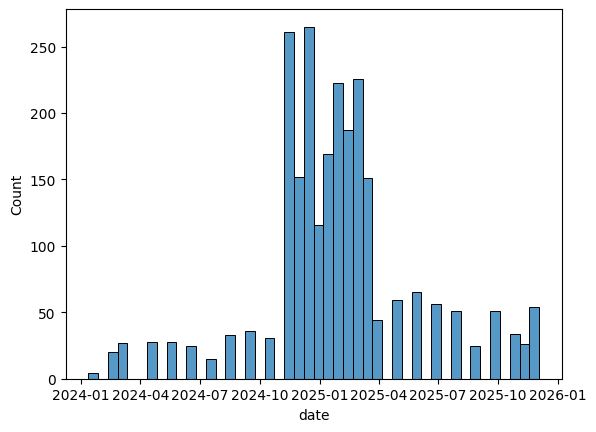

In [ ]:
sns.histplot(df2.date)

<Axes: xlabel='date', ylabel='Count'>

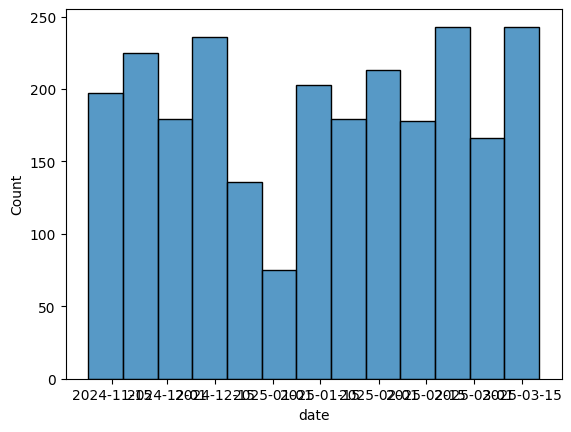

In [ ]:
sns.histplot(df3.date)

In [ ]:
df2.date = df2.date.apply(lambda x: pd.to_datetime(x, format = '%Y-%m-%d'))

In [ ]:
df2.date.describe()

,date
count,2462
mean,2025-01-29 01:00:14.622258176
min,2024-01-12 00:00:00
25%,2024-11-28 00:00:00
50%,2025-01-22 00:00:00
75%,2025-03-10 12:00:00
max,2025-12-03 00:00:00


<Axes: xlabel='date', ylabel='Count'>

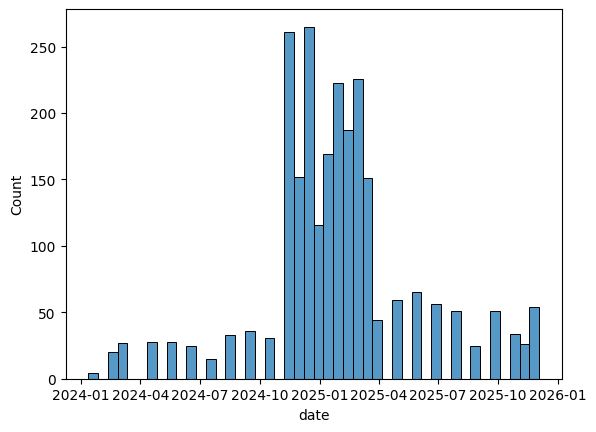

In [ ]:
sns.histplot(df2.date)

In [ ]:
df2.link.iloc[300]

'https://www.hellenicshippingnews.com/imo-sub-committee-on-ship-systems-and-equipment-sse-11/'

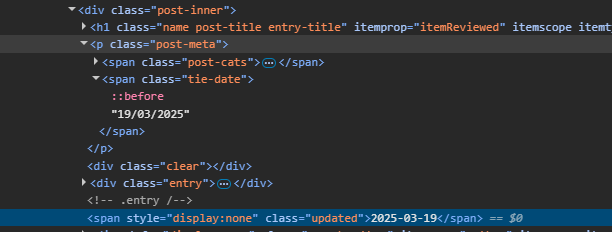